In [1]:
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal

In [2]:
# BNB fund amount
A_FUND_AMOUNT = Decimal('1.0')
# BTC fund amount
B_FUND_AMOUNT = Decimal('0.0')

# fee in real:
FREE_REAL = Decimal('.01')

A_LIMIT = Decimal('.000001')
B_LIMIT = Decimal('.01')

A_FUND_AMOUNT_LIST = []
B_FUND_AMOUNT_LIST = []
PRICE_LIST = []

In [3]:
def buy():
    global PRICE, A_FUND_AMOUNT, B_FUND_AMOUNT, FREE_REAL
    # buy A sell B:
#     print("buy with price {}".format(PRICE))
    sell_amount_B = B_FUND_AMOUNT - (B_FUND_AMOUNT % B_LIMIT)
    
    cost = (sell_amount_B * FREE_REAL) / PRICE

    B_FUND_AMOUNT -= sell_amount_B
    A_FUND_AMOUNT += (sell_amount_B / PRICE - cost)

In [4]:
def sell():
    global PRICE, A_FUND_AMOUNT, B_FUND_AMOUNT, FREE_REAL
    # buy B sell A:
#     print("sell with price {}".format(PRICE))
    sell_amount_A = A_FUND_AMOUNT - (A_FUND_AMOUNT % A_LIMIT)

    cost = sell_amount_A * FREE_REAL * PRICE

    A_FUND_AMOUNT -= sell_amount_A
    B_FUND_AMOUNT += (sell_amount_A * PRICE - cost)

# Visualized data

In [5]:
test_file = '/home/nam/data/ccxt/extra/BTC_USDT_binance_1h.csv'

In [6]:
import pandas as pd
df = pd.read_csv(test_file)
df

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume,N_buy,N_sell,buy_amount_avg,...,buy_amount_std,sell_amount_std,price_avg,price_std,cost_avg,cost_std,Spread_Open_Close,Spread_High_Low,MA_Close_24,MA_Close_240
0,266,1503900000000,4223.80,4282.07,4199.01,4221.04,16.856597,107,23,0.117430,...,0.234191,0.363954,4241.023308,15.720408,550.033350,1116.388945,2.76,83.06,4302.003333,4160.801375
1,267,1503903600000,4221.04,4297.11,4207.42,4261.90,16.696129,62,43,0.128111,...,0.198387,0.364079,4254.870381,22.449831,676.387988,1191.448725,-40.86,89.69,4299.839167,4160.692958
2,268,1503907200000,4261.90,4305.00,4239.15,4252.70,22.834958,47,58,0.267580,...,0.493872,0.245716,4268.531143,19.208823,929.817679,1627.918953,9.20,65.85,4297.779167,4160.439375
3,269,1503910800000,4252.70,4298.83,4226.93,4227.00,18.001161,22,88,0.198887,...,0.171198,0.319228,4246.116091,14.911601,695.403178,1256.863098,25.70,71.90,4293.870417,4160.220792
4,270,1503914400000,4240.00,4317.21,4240.00,4290.77,36.987361,21,117,0.162762,...,0.214509,0.487020,4270.900072,18.893371,1144.065203,1955.554849,-50.77,77.21,4293.372083,4160.181292
5,271,1503918000000,4290.77,4365.40,4288.07,4308.00,43.898554,42,121,0.425520,...,0.483295,0.373283,4312.046933,16.542912,1162.445868,1791.126430,-17.23,77.33,4292.731667,4160.286583
6,272,1503921600000,4309.00,4347.00,4271.86,4280.00,34.096299,42,126,0.204826,...,0.264881,0.364066,4301.528869,19.729643,873.541714,1473.216067,29.00,75.14,4291.954167,4160.185958
7,273,1503925200000,4280.00,4347.00,4279.82,4347.00,20.362853,61,80,0.136170,...,0.174213,0.302694,4316.162624,20.282823,623.234108,1100.285988,-67.00,67.18,4293.383750,4160.147167
8,274,1503928800000,4295.32,4320.90,4279.82,4291.13,32.232606,18,114,0.192886,...,0.197127,0.452318,4297.862955,8.629221,1049.855766,1838.679843,4.19,41.08,4292.506250,4159.942250
9,275,1503932400000,4291.13,4315.00,4271.03,4273.59,35.166793,9,170,0.416308,...,0.534939,0.404939,4291.830056,9.475700,843.756927,1786.749889,17.54,43.97,4290.364167,4159.700083


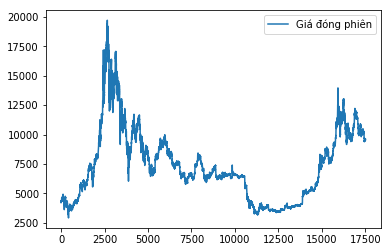

In [7]:
plt.plot(df.Close, label='Giá đóng phiên')
plt.legend()
plt.show()

In [8]:
def strategy_01_current_price(threshold = 0.01):
    fee_assume = Decimal(threshold)
    global PRICE, A_FUND_AMOUNT, B_FUND_AMOUNT, Close_lst, Ts_lst
    global A_FUND_AMOUNT_LIST, B_FUND_AMOUNT_LIST, PRICE_LIST, SELL_TS, SELL_PRICE, BUY_TS, BUY_PRICE
    A_FUND_AMOUNT = Decimal('1.0')
    B_FUND_AMOUNT = Decimal('0.0')
    A_FUND_AMOUNT_LIST = []
    B_FUND_AMOUNT_LIST = []
    
    PRICE_LIST = []
    SELL_TS = []; BUY_TS = []; SELL_PRICE = []; BUY_PRICE = []
    PRICE = Decimal(str(Close_lst[0]))
    PREV_SIDE = 'buy'
    for NEW_PRICE, ts in zip(Close_lst[1:], Ts_lst[1:]):
        NEW_PRICE = Decimal(str(NEW_PRICE))
        if NEW_PRICE > PRICE / (Decimal('1.0') - fee_assume) and PREV_SIDE == 'buy':
            PRICE = NEW_PRICE
            sell()

            PREV_SIDE = 'sell'
            PRICE_LIST.append(PRICE)
            SELL_TS.append(ts)
            SELL_PRICE.append(PRICE)
            A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
            B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)
            

        elif NEW_PRICE < PRICE * (Decimal('1.0') - fee_assume) and PREV_SIDE == 'sell':
            PRICE = NEW_PRICE
            buy()

            PREV_SIDE = 'buy'
            PRICE_LIST.append(PRICE)
            BUY_TS.append(ts)
            BUY_PRICE.append(PRICE)
            A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
            B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)


    print("Number of trade: ", len(A_FUND_AMOUNT_LIST))

    print(A_FUND_AMOUNT, "  BTC")
    print(B_FUND_AMOUNT, "  USDT")

    print("Init amount USDT is ", Decimal('1.0') *
          Decimal(Close_lst[0]), "  USDT")
    
    balance = A_FUND_AMOUNT * Decimal(Close_lst[-1]) + B_FUND_AMOUNT
    print("Last amount USDT is ", balance , "  USDT")
    return balance

# Simulate: If know exactly next price in future

In [9]:
def strategy_01_future_price(threshold = 0.01):
    fee_assume = Decimal(threshold)
    global PRICE, A_FUND_AMOUNT, B_FUND_AMOUNT, Close_lst, Ts_lst
    global A_FUND_AMOUNT_LIST, B_FUND_AMOUNT_LIST, PRICE_LIST, SELL_TS, SELL_PRICE, BUY_TS, BUY_PRICE
    A_FUND_AMOUNT = Decimal('1.0')
    B_FUND_AMOUNT = Decimal('0.0')
    A_FUND_AMOUNT_LIST = []
    B_FUND_AMOUNT_LIST = []
    
    PRICE_LIST = []
    SELL_TS = []; BUY_TS = []; SELL_PRICE = []; BUY_PRICE = []
    PRICE = Decimal(str(Close_lst[0]))
    PREV_SIDE = 'buy'
    for NEW_PRICE, ts, FUTURE_PRICE in zip(Close_lst[1:-1], Ts_lst[1:-1], Close_lst[2:]):
        NEW_PRICE = Decimal(str(NEW_PRICE))
        FUTURE_PRICE = Decimal(str(FUTURE_PRICE))
        if NEW_PRICE > PRICE / (Decimal('1.0') - fee_assume) and FUTURE_PRICE < NEW_PRICE and PREV_SIDE == 'buy':
            PRICE = NEW_PRICE
            sell()

            PREV_SIDE = 'sell'
            PRICE_LIST.append(PRICE)
            SELL_TS.append(ts)
            SELL_PRICE.append(PRICE)
            A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
            B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)
            

        elif NEW_PRICE < PRICE * (Decimal('1.0') - fee_assume) and FUTURE_PRICE > NEW_PRICE and PREV_SIDE == 'sell':
            PRICE = NEW_PRICE
            buy()

            PREV_SIDE = 'buy'
            PRICE_LIST.append(PRICE)
            BUY_TS.append(ts)
            BUY_PRICE.append(PRICE)
            A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
            B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)


    print("Number of trade: ", len(A_FUND_AMOUNT_LIST))

    print(A_FUND_AMOUNT, "  BTC")
    print(B_FUND_AMOUNT, "  USDT")

    
    print("Init amount USDT is ", Decimal('1.0') *
          Decimal(Close_lst[0]), "  USDT")
    
    balance = A_FUND_AMOUNT * Decimal(Close_lst[-1]) + B_FUND_AMOUNT
    print("Last amount USDT is ", balance , "  USDT")
    return balance

In [10]:
from copy import deepcopy

def draw_simulation(img_out = None, from_idx = -1, to_idx = -1):
    global SELL_PRICE,SELL_TS, BUY_PRICE, BUY_TS, df
    plt.rcParams["figure.figsize"] = (20,10)
    
    df_tmp = deepcopy(df)
    
    if from_idx != -1 and to_idx !=-1:
        df_tmp = df[from_idx:to_idx]
        
    df_tmp['ts'] = pd.to_datetime(df['Timestamp'], unit='ms')
    df_tmp[['ts', 'Close']].set_index('ts').plot()

    plt.scatter(SELL_TS, SELL_PRICE, s= 300, facecolor='green')
    
    plt.scatter(BUY_TS, BUY_PRICE, s= 300, facecolor='red')
    plt.legend()
    plt.xlabel('Thời gian', fontsize=18)
    plt.ylabel('Giá đóng phiên', fontsize=16)
    
    if img_out:
        plt.savefig('figures/' + img_out)
        
    plt.show()

# Better Profit

In [11]:
Close_lst = df.Close.values
Ts_lst = df.Timestamp.values
strategy_01_current_price(threshold = 0.01)
strategy_01_future_price(threshold = 0.01)

Number of trade:  65
9.3124774808244487542E-8   BTC
4113.278567784900000000000000   USDT
Init amount USDT is  4221.039999999999963620211929   USDT
Last amount USDT is  4113.279460615884730799715993   USDT
Number of trade:  53
9.97557794380913616998E-7   BTC
5811.630794460700000000000000   USDT
Init amount USDT is  4221.039999999999963620211929   USDT
Last amount USDT is  5811.640358516126893177222323   USDT


Decimal('5811.640358516126893177222323')

In [12]:
Close_lst = df.Close.values
Ts_lst = df.Timestamp.values
strategy_01_current_price(threshold = 0.1)
strategy_01_future_price(threshold = 0.1)

Number of trade:  7
8.68440945230279958635E-7   BTC
6094.163678112000000000000000   USDT
Init amount USDT is  4221.039999999999963620211929   USDT
Last amount USDT is  6094.172004263509166951626328   USDT
Number of trade:  7
3.65062288478947599376E-7   BTC
6488.666455830200000000000000   USDT
Init amount USDT is  4221.039999999999963620211929   USDT
Last amount USDT is  6488.669955853938923255501533   USDT


Decimal('6488.669955853938923255501533')

In [15]:
Close_lst = df.Close.values
Ts_lst = df.Timestamp.values
strategy_01_current_price(threshold = 0.015)
strategy_01_future_price(threshold = 0.015)

Number of trade:  51
2.78181304291303601701E-7   BTC
4637.537406007200000000000000   USDT
Init amount USDT is  4221.039999999999963620211929   USDT
Last amount USDT is  4637.540073062109453744360037   USDT
Number of trade:  51
7.21561825403980732010E-7   BTC
7025.819688647400000000000000   USDT
Init amount USDT is  4221.039999999999963620211929   USDT
Last amount USDT is  7025.826606599754205902676219   USDT


Decimal('7025.826606599754205902676219')

# Risk case Worse performance

In [13]:
Close_lst = df.Close.values
Ts_lst = df.Timestamp.values
strategy_01_current_price(threshold = 0.001)
strategy_01_future_price(threshold = 0.001)

Number of trade:  129
6.140415720944705323607E-7   BTC
2143.972415763500000000000000   USDT
Init amount USDT is  4221.039999999999963620211929   USDT
Last amount USDT is  2143.978302868651208572992796   USDT
Number of trade:  857
9.3320483210537208016150E-7   BTC
305.2333066762000000000000000   USDT
Init amount USDT is  4221.039999999999963620211929   USDT
Last amount USDT is  305.2422537495316652910462897   USDT


Decimal('305.2422537495316652910462897')